# Quickstart

In this notebook, we will download the light curve of a known solar-like oscillator, find its large separation using echelle, and then make a pretty plot ready for publication!

To download the star, we'll use the excellent [lightkurve](https://docs.lightkurve.org/) package

In [1]:
import lightkurve as lk

We'll study KIC 11615890, one of my favourites:

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

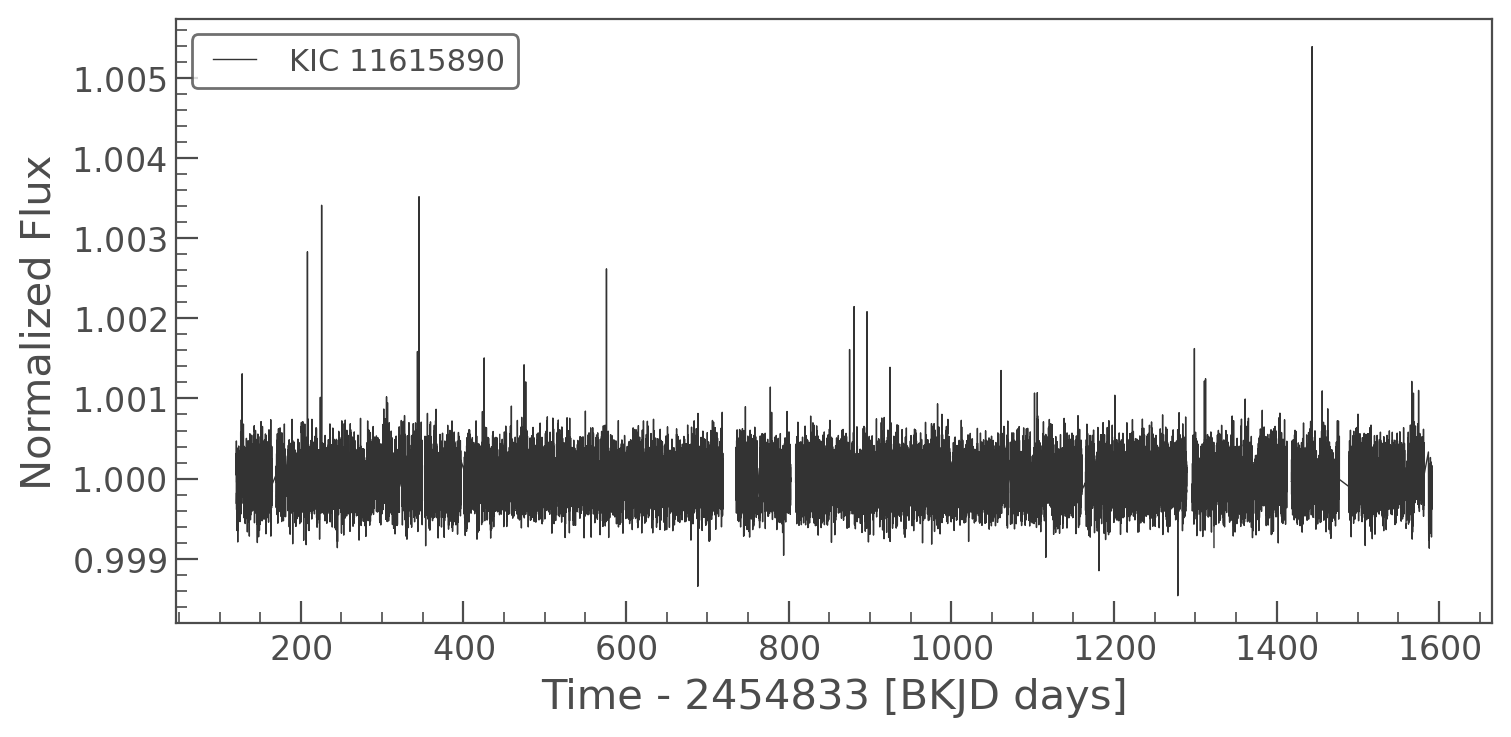

In [2]:
lc = lk.search_lightcurve('KIC 11615890').download_all().stitch()
lc.plot()

Looks good! Now, for the echelle diagram we need the power (or amplitude) spectrum of the star. This is functionally identical to the fourier transform on unevenly sampled data:

<AxesSubplot:xlabel='Frequency [$\\mathrm{\\mu Hz}$]', ylabel='Power [$\\mathrm{\\frac{1}{\\mu Hz}}$]'>

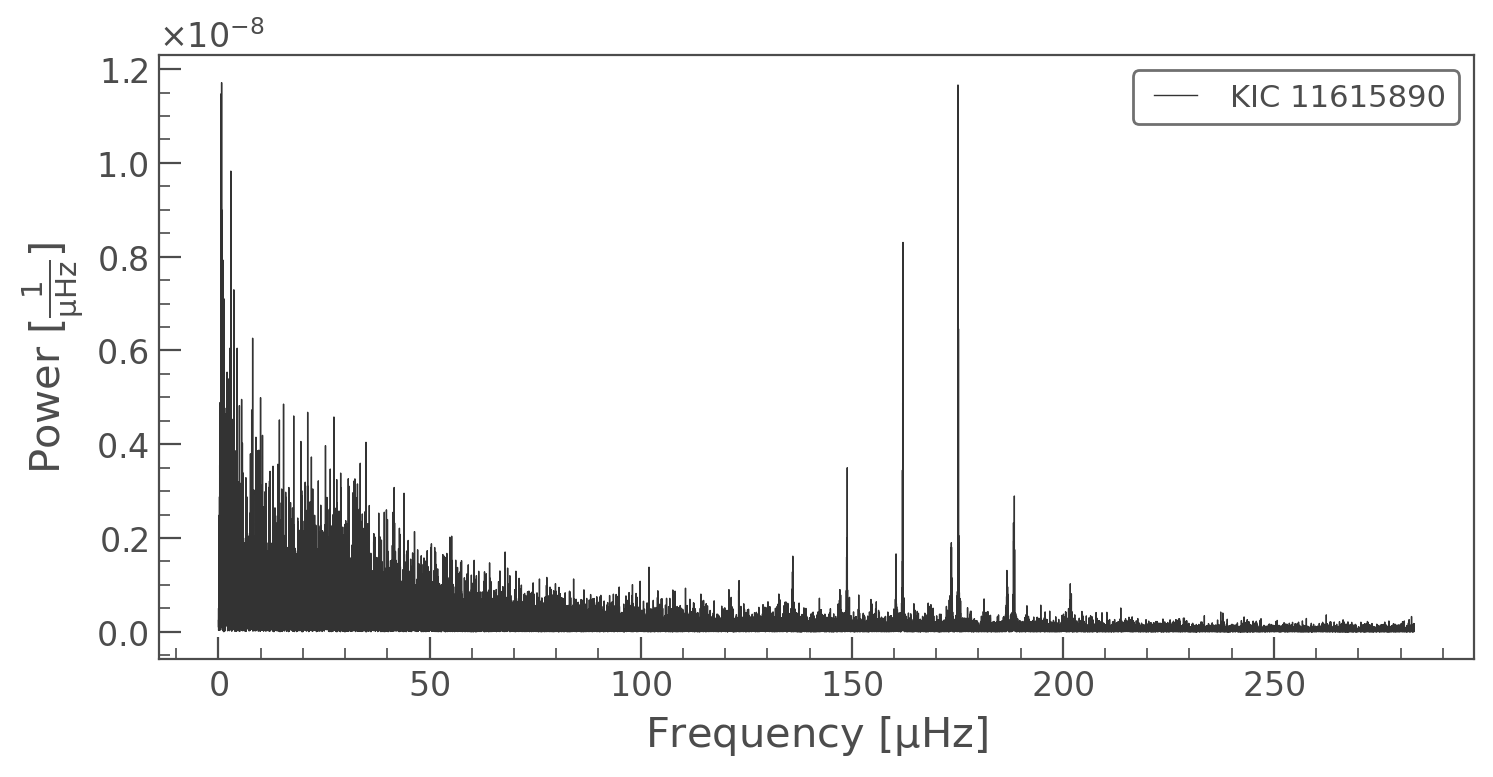

In [8]:
pg = lc.to_periodogram(normalization='psd')
pg.plot()

Now we're ready to make our echelle diagram! It looks like the modes around 160 microhertz are separated by ~15 microhertz. So let's explore around this range. Note that I scale the power values by 'sqrt' in the function call. This brings out more features to the eye.

In [11]:
import echelle

echelle.interact_echelle(pg.frequency.value, pg.power.value, 10, 20, scale='sqrt', backend='bokeh')

Great! Looks like we have a good value. Now we can make a nice plot

<AxesSubplot:xlabel='Frequency mod 13.164', ylabel='Frequency'>

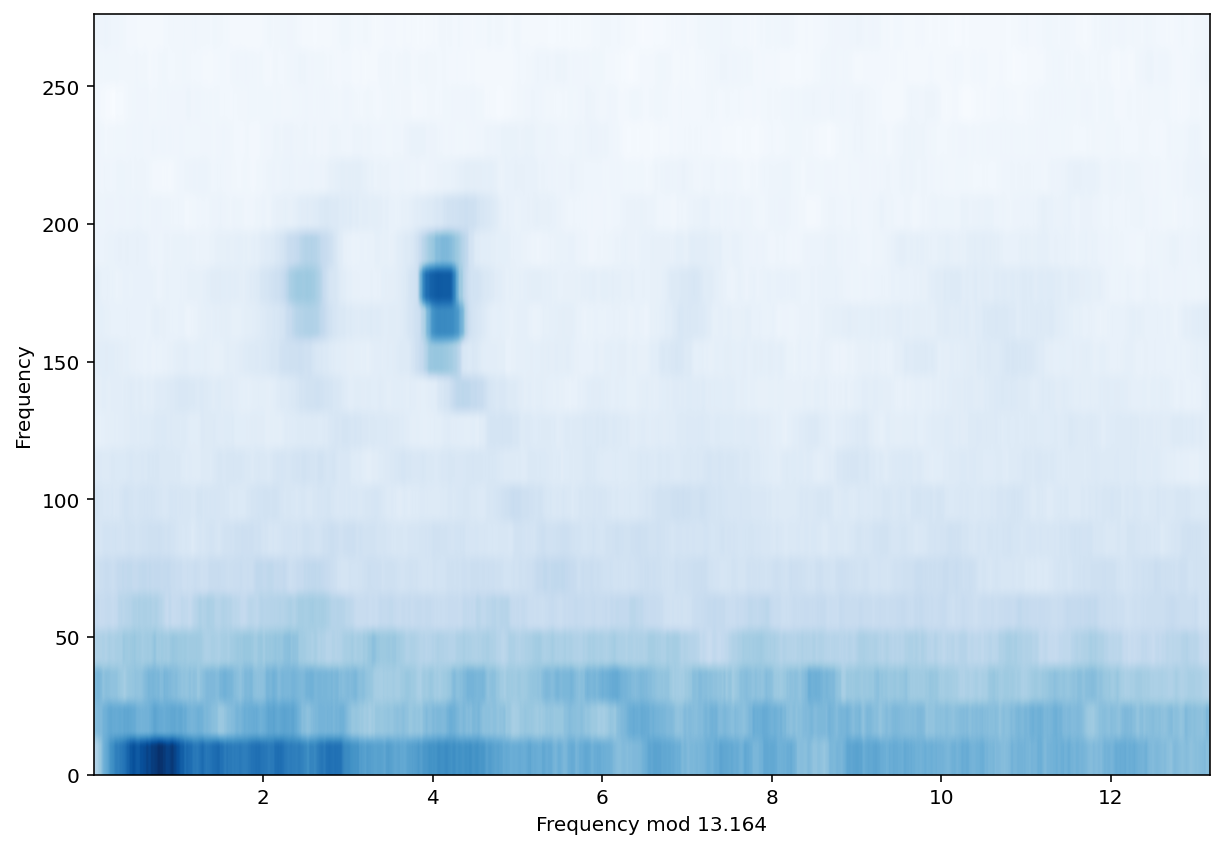

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[10,7])
echelle.plot_echelle(pg.frequency.value, pg.power.value, 13.164, scale='sqrt', smooth=True, ax=ax)

And that's mostly it! There are a lot of extra parameters that can be passed into the functions. So check out the docs.